In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
import sklearn

In [15]:
import sklearn
print(sklearn.__version__)

1.3.2


In [16]:
warnings.filterwarnings('ignore')

In [17]:
# dataset
dataset=pd.read_csv("ADA_DATASET.csv")
dataset.head(40)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-18,92893,-462,1313,50991,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,11,93994,-364,4855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,14,94465,-418,4962,52281,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,14,94465,-418,4959,52281,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-1,932,-42,4191,51958,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-11,94199,-375,884,49636,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-11,94199,-375,879,49636,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-1,932,-42,4191,51958,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-1,932,-42,4153,51958,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,11,93994,-364,4855,5191,no


In [18]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.987376,84933.079388,-363.312212,3281.667395,43067.341345
std,10.313362,254.703736,2.568159,191.922786,0.541788,15.476951,27020.766211,121.795881,1938.283415,18004.283568
min,18.000000,0.000000,1.000000,0.000000,0.000000,-34.000000,932.000000,-508.000000,1.000000,5191.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-18.000000,92893.000000,-427.000000,1281.000000,50175.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,11.000000,93749.000000,-398.000000,4856.000000,50991.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,14.000000,93994.000000,-361.000000,4961.000000,52281.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,14.000000,94767.000000,-33.000000,5045.000000,52281.000000


In [19]:
# Representation unbalanced target data
TargetValue = dataset['y'].value_counts()
print(TargetValue)

y
no     3668
yes     451
Name: count, dtype: int64


# 1. Feature Creation

In [20]:
dataset['campaign_previous_interaction'] = dataset['campaign'] * dataset['previous']
dataset.columns
df=dataset.drop(columns=['campaign', 'previous'])

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'pdays', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'campaign_previous_interaction'],
      dtype='object')

In [22]:
# Representation unbalanced target data
TargetValue = df['y'].value_counts()
print(TargetValue)

y
no     3668
yes     451
Name: count, dtype: int64


# 2. Handling Imbalanced Data

In [23]:
# Convert `y` values
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separating majority and minority classes
df_majority = df[df.y == 0]
df_minority = df[df.y == 1]

# oversample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Reusing examples
                                 n_samples=len(df_majority),   # Create as many instances as the majority class
                                 random_state=42) # Random state to get the same results

# Merge balanced data set
df_balanced_resampled = pd.concat([df_majority, df_minority_upsampled])

# Checking target values ​​after balancing
balanced_class_counts = df_balanced_resampled['y'].value_counts()

In [24]:
print(balanced_class_counts)

y
0    3668
1    3668
Name: count, dtype: int64


# 3. Data Cleaning(Fill the 'Unkown's)

In [25]:
# Function to fill in missing data
def fill_unknowns(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].replace('unknown', most_frequent_value)
    return df

In [26]:
# Define X and target
X = df_balanced_resampled.drop('y', axis=1)
y = df_balanced_resampled['y']

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Data Preprocessing(Standard Scaling and Encoding)

In [28]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Conversion steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining numeric and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [29]:
# Defining the function that removes fixed properties. Probably, we are not going to use this. It was an experiment.
class RemoveConstantFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.non_constant_columns = (X.std(axis=0) != 0)
        return self
    
    def transform(self, X):
        return X[:, self.non_constant_columns]

In [30]:
# Using SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=13)

# 5. Model Selection

## 5.1 Logistic Regression

In [31]:
# Creating Pipeline for Logistic Regression
pipeline_Logistic = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('remove_constants', RemoveConstantFeatures()),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=13)),
    ('classifier', LogisticRegression(random_state=42))
])

In [32]:
pipeline_Logistic.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_previous_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('remove_constants', RemoveConstantFeatures()),
                ('smote', SMOTE(random_state=42)),
                ('selector', SelectKBest(k=13)),
                ('classifier', LogisticRegression(random_state=42))])

In [33]:
y_pred_Logistic = pipeline_Logistic.predict(X_test)
accuracy_logistic = pipeline_Logistic.score(X_test, y_test)
print("Accuracy:" ,accuracy_logistic)

Accuracy: 0.8542234332425068


In [34]:
# Model evaluation
conf_matrix = confusion_matrix(y_test, y_pred_Logistic)
class_report = classification_report(y_test, y_pred_Logistic)
f1 = f1_score(y_test, y_pred_Logistic, average='weighted')  # weighted average, because the dataset may be imbalanced

print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Logistic Regression Classification Report:")
print(class_report)
print(f"F1 Score: {f1}")

# Evaluation with cross-validation
cross_val_scores = cross_val_score(pipeline_Logistic, X, y, cv=5, scoring='f1_weighted')
print("Logistic Regression Cross-Validation Scores:", cross_val_scores)
print("Logistic Regression Cross-Validation Mean Score:", cross_val_scores.mean())

Logistic Regression Confusion Matrix:
[[625 110]
 [104 629]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       735
           1       0.85      0.86      0.85       733

    accuracy                           0.85      1468
   macro avg       0.85      0.85      0.85      1468
weighted avg       0.85      0.85      0.85      1468

F1 Score: 0.8542218097508065
Logistic Regression Cross-Validation Scores: [0.86648105 0.84864924 0.87248738 0.85752642 0.83700735]
Logistic Regression Cross-Validation Mean Score: 0.8564302864209598


## 5.2 KNN

In [35]:
# Creating pipeline for KNN
knn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('remove_constants', RemoveConstantFeatures()),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [36]:
# Training the KNN pipeline
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_previous_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('remove_constants', RemoveConstantFeatures()),
                ('smote', SMOTE(random_state=42)), ('selector', SelectKBest()),
                ('classifier', KNeighborsClassifier())])

In [37]:
# Make predictions
y_pred_knn = knn_pipeline.predict(X_test)

In [38]:
# Model Evaluation 
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # Weighted average, because the dataset may be imbalanced

print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print("KNN Classification Report:")
print(class_report_knn)
print(f"KNN F1 Score: {f1_knn}")

# Evaluation with cross-validation
cross_val_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5, scoring='f1_weighted')
print("KNN Cross-Validation Scores:", cross_val_scores_knn)
print("KNN Cross-Validation Mean Score:", cross_val_scores_knn.mean())

KNN Confusion Matrix:
[[642  93]
 [ 11 722]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.93       735
           1       0.89      0.98      0.93       733

    accuracy                           0.93      1468
   macro avg       0.93      0.93      0.93      1468
weighted avg       0.93      0.93      0.93      1468

KNN F1 Score: 0.9289390162495329
KNN Cross-Validation Scores: [0.93504736 0.93432671 0.93363716 0.92326433 0.91422289]
KNN Cross-Validation Mean Score: 0.9280996909941305


In [39]:
# Parameter grid for hyperparameter search
param_grid = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Finding the best parameters for KNN with GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Make predictions using the best model
best_knn_model = grid_search.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)

# Model evaluation
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
class_report_best_knn = classification_report(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn, average='weighted')

print("Best KNN Confusion Matrix:")
print(conf_matrix_best_knn)
print("Best KNN Classification Report:")
print(class_report_best_knn)
print(f"Best KNN F1 Score: {f1_best_knn}")

Best parameters found:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}
Best cross-validation score:  0.9585309759391448
Best KNN Confusion Matrix:
[[693  42]
 [  1 732]]
Best KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       735
           1       0.95      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Best KNN F1 Score: 0.9706866975615338


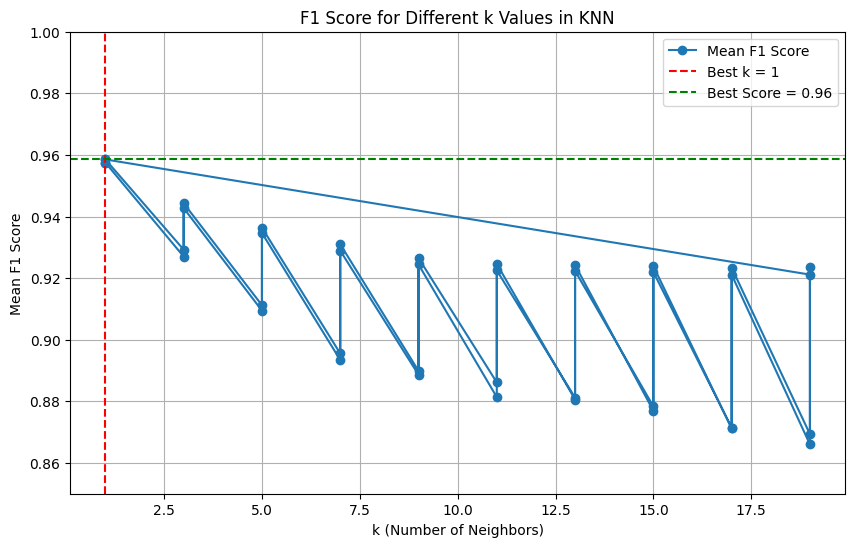

In [40]:
# Get the best parameters and results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['param_classifier__n_neighbors']

# Let's find the best k value and the best score
best_k = grid_search.best_params_['classifier__n_neighbors']
best_score = grid_search.best_score_

# draw the graph
plt.figure(figsize=(10, 6))
plt.plot(params, mean_test_scores, marker='o', label='Mean F1 Score')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.axhline(best_score, color='g', linestyle='--', label=f'Best Score = {best_score:.2f}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean F1 Score')
plt.title('F1 Score for Different k Values in KNN')
plt.ylim(0.85, 1.0)
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Training set performance
y_train_pred = knn_pipeline.predict(X_train)
train_accuracy = knn_pipeline.score(X_train, y_train)
print("Training Accuracy: ", train_accuracy)
print("Training Classification Report: ")
print(classification_report(y_train, y_train_pred))

# Test set performance
y_test_pred = knn_pipeline.predict(X_test)
test_accuracy = knn_pipeline.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))

# Confusion matrices
print("Training Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy:  0.9429107021131561
Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2933
           1       0.90      1.00      0.95      2935

    accuracy                           0.94      5868
   macro avg       0.95      0.94      0.94      5868
weighted avg       0.95      0.94      0.94      5868

Test Accuracy:  0.9291553133514986
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.87      0.93       735
           1       0.89      0.98      0.93       733

    accuracy                           0.93      1468
   macro avg       0.93      0.93      0.93      1468
weighted avg       0.93      0.93      0.93      1468

Training Confusion Matrix: 
[[2606  327]
 [   8 2927]]
Test Confusion Matrix: 
[[642  93]
 [ 11 722]]


* The training set and test set accuracy rates are very close (94% and 93%). This shows that the model does not overfit the training set.
* Precision, Recall and F1-Score values ​​are also similar between training and test sets. This shows that there is no overfitting.

* General evaluation:
Your model performs similarly on both the training and test set. This shows that the model generalizes well and is not overfitting.
There may be a small amount of higher accuracy in the training set, but this is normal and not a big problem.

## 5.3 Decision Tree

In [42]:
# creating pipeline for DT
dt_pipeline= ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [43]:
# Fitting
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_previous_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)), ('selector', SelectKBest()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [44]:
# Predictions
y_pred_dt = dt_pipeline.predict(X_test)

In [45]:
# Model Evaluation
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)
print("Decision Tree Classification Report:")
print(class_report_dt)
print(f"Decision Tree F1 Score: {f1_dt}")

Decision Tree Confusion Matrix:
[[695  40]
 [  0 733]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       735
           1       0.95      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Decision Tree F1 Score: 0.9727328119481576


In [47]:
# Parameter grid for hyperparameter tuning
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 12, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Finding the best parameters for Decision Tree with GridSearchCV
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Make predictions using the best mode
dt_best_model = grid_search.best_estimator_
y_pred_best = dt_best_model.predict(X_test)

# Model Evaluation
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Best Decision Tree with SMOTE Confusion Matrix:")
print(conf_matrix_best)
print("Best Decision Tree with SMOTE Classification Report:")
print(class_report_best)
print(f"Best Decision Tree with SMOTE F1 Score: {f1_best}")

Best parameters found:  {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best cross-validation score:  0.9498035526936903
Best Decision Tree with SMOTE Confusion Matrix:
[[686  49]
 [  3 730]]
Best Decision Tree with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       735
           1       0.94      1.00      0.97       733

    accuracy                           0.96      1468
   macro avg       0.97      0.96      0.96      1468
weighted avg       0.97      0.96      0.96      1468

Best Decision Tree with SMOTE F1 Score: 0.9645443580725857


In [48]:
# Training Set Performance
y_train_pred = dt_pipeline.predict(X_train)
train_accuracy = dt_pipeline.score(X_train, y_train)
print("Training Accuracy: ", train_accuracy)
print("Training Classification Report: ")
print(classification_report(y_train, y_train_pred))

# Test Set Performance
y_test_pred = dt_pipeline.predict(X_test)
test_accuracy = dt_pipeline.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))

# Confusion matrices
print("Training Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy:  0.9994887525562373
Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2933
           1       1.00      1.00      1.00      2935

    accuracy                           1.00      5868
   macro avg       1.00      1.00      1.00      5868
weighted avg       1.00      1.00      1.00      5868

Test Accuracy:  0.9727520435967303
Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       735
           1       0.95      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Training Confusion Matrix: 
[[2931    2]
 [   1 2934]]
Test Confusion Matrix: 
[[695  40]
 [  0 733]]


## 5.4 Random Forest

In [49]:
# Creating Pipeline for Random Forest
rf_pipeline=ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('remove_constants', RemoveConstantFeatures()),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [50]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_previous_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('remove_constants', RemoveConstantFeatures()),
                ('smote', SMOTE(random_state=42)), ('selector', SelectKBest()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [51]:
y_pred_rf = rf_pipeline.predict(X_test)

In [52]:
# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest with SMOTE Confusion Matrix:")
print(conf_matrix)
print("Random Forest with SMOTE Classification Report:")
print(class_report)
print(f"Random Forest with SMOTE F1 Score: {f1}")

Random Forest with SMOTE Confusion Matrix:
[[684  51]
 [  0 733]]
Random Forest with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       735
           1       0.93      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Random Forest with SMOTE F1 Score: 0.9652185242691578


In [53]:
# Parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Finding the best parameters for Random Forest with GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best cross-validation score:  0.9544144622974958


In [54]:
rf_best_model = grid_search.best_estimator_
y_pred_best = rf_best_model.predict(X_test)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Best Random Forest with SMOTE Confusion Matrix:")
print(conf_matrix_best)
print("Best Random Forest with SMOTE Classification Report:")
print(class_report_best)
print(f"Best Random Forest with SMOTE F1 Score: {f1_best}")

Best Random Forest with SMOTE Confusion Matrix:
[[683  52]
 [  0 733]]
Best Random Forest with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       735
           1       0.93      1.00      0.97       733

    accuracy                           0.96      1468
   macro avg       0.97      0.96      0.96      1468
weighted avg       0.97      0.96      0.96      1468

Best Random Forest with SMOTE F1 Score: 0.9645348705824732


In [55]:
# training set performance
y_train_pred = rf_pipeline.predict(X_train)
train_accuracy = rf_pipeline.score(X_train, y_train)
print("Training Accuracy: ", train_accuracy)
print("Training Classification Report: ")
print(classification_report(y_train, y_train_pred))

# test set performance
y_test_pred = rf_pipeline.predict(X_test)
test_accuracy = rf_pipeline.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))

# Confusion matrices
print("Training Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy:  0.9994887525562373
Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2933
           1       1.00      1.00      1.00      2935

    accuracy                           1.00      5868
   macro avg       1.00      1.00      1.00      5868
weighted avg       1.00      1.00      1.00      5868

Test Accuracy:  0.965258855585831
Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       735
           1       0.93      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Training Confusion Matrix: 
[[2931    2]
 [   1 2934]]
Test Confusion Matrix: 
[[684  51]
 [  0 733]]


## 5.5 Gradient Boosting

In [57]:
# creating pipeline for GB
gb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('remove_constants', RemoveConstantFeatures()),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [58]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_previous_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('remove_constants', RemoveConstantFeatures()),
                ('smote', SMOTE(random_state=42)), ('selector', SelectKBest()),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [59]:
y_pred_gb = gb_pipeline.predict(X_test)

In [60]:
# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_gb)
class_report = classification_report(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb, average='weighted')

print("Gradient Boosting with SMOTE Confusion Matrix:")
print(conf_matrix)
print("Gradient Boosting with SMOTE Classification Report:")
print(class_report)
print(f"Gradient Boosting with SMOTE F1 Score: {f1}")

Gradient Boosting with SMOTE Confusion Matrix:
[[629 106]
 [ 36 697]]
Gradient Boosting with SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       735
           1       0.87      0.95      0.91       733

    accuracy                           0.90      1468
   macro avg       0.91      0.90      0.90      1468
weighted avg       0.91      0.90      0.90      1468

Gradient Boosting with SMOTE F1 Score: 0.9030556383401454


In [64]:
# Finding the best parameters for Gradient Boosting with GridSearchCV
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

 # Make predictions using the best model
gb_best_model = grid_search.best_estimator_
y_pred_best = gb_best_model.predict(X_test)

# Model evaluation
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Best Gradient Boosting with SMOTE Confusion Matrix:")
print(conf_matrix_best)
print("Best Gradient Boosting with SMOTE Classification Report:")
print(class_report_best)
print(f"Best Gradient Boosting with SMOTE F1 Score: {f1_best}")

KeyboardInterrupt: 

In [63]:
# Define the pipelines for different models
pipelines = {
    'Logistic Regression': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'KNN': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', KNeighborsClassifier())
    ]),
    'Decision Tree': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('remove_constants', RemoveConstantFeatures()),
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('remove_constants', RemoveConstantFeatures()),
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# Define the parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    }
}

# Dictionary to store the best models
best_models = {}

# Perform grid search and evaluation for each model
for model_name, pipeline in pipelines.items():
    # Grid search
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Evaluate model performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"F1 Score: {f1}\n")

Model: Logistic Regression
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Confusion Matrix:
[[611 124]
 [109 624]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       735
           1       0.83      0.85      0.84       733

    accuracy                           0.84      1468
   macro avg       0.84      0.84      0.84      1468
weighted avg       0.84      0.84      0.84      1468

F1 Score: 0.8412662909091344

Model: KNN
Best Parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Confusion Matrix:
[[675  60]
 [  0 733]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       735
           1       0.92      1.00      0.96       733

    accuracy                           0.96      1468
   macro avg       0.96      0.96      0.96      1468
weighted avg       0.96      0.96      0.96      14

## Choosing Between Decision Tree and Gradient Boosting:

When deciding between the Decision Tree and Gradient Boosting models, consider the following factors:

1. Performance:
Both models have a similar F1-Score (0.97).
Gradient Boosting is generally more complex and powerful, which might indicate better generalization capability.
2. Model Complexity and Computational Cost:
Decision Tree: Simpler and faster. It has a lower computational cost.
Gradient Boosting: More complex and requires more computational resources.
3. Feature Importance and Interpretability:
Decision Tree: More interpretable. The tree structure can be easily visualized, and the contribution of features to the decision process is understandable.
Gradient Boosting: Less interpretable, as it consists of an ensemble of many weak models.
4. Generalization Ability:
Gradient Boosting: Typically has better generalization ability and includes mechanisms to reduce overfitting.
5. Data Size and Number of Features:
Decision Tree: Suitable for smaller datasets and fewer features.
Gradient Boosting: Better for larger datasets and high-dimensional data

If interpretability and speed are important to us, we might prefer the Decision Tree model. However, if we aim for higher generalization ability and performance, Gradient Boosting is likely the better choice.

## Conclusion:

Although peed and interpretability are important in this project, we are going to continue with Decision Tree Model.

In [65]:
# Define the parameter grid for Grid Search
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_decision_tree_model = grid_search.best_estimator_

# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Cross-Validation Score: 0.9578403515443851


In [67]:
# Save the best model
model_filename = 'BMO_model.pkl'
joblib.dump(best_decision_tree_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to BMO_model.pkl


In [68]:
# Evaluate the best model on the test set
y_pred_best = best_decision_tree_model.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Best Decision Tree Confusion Matrix:")
print(conf_matrix_best)
print("Best Decision Tree Classification Report:")
print(class_report_best)
print(f"Best Decision Tree F1 Score: {f1_best}")

Best Decision Tree Confusion Matrix:
[[695  40]
 [  0 733]]
Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       735
           1       0.95      1.00      0.97       733

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Best Decision Tree F1 Score: 0.9727328119481576


In [69]:
import sklearn
print(sklearn.__version__)

1.3.2
